In [3]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2000-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [5]:
S0 = data.iloc[-1]
S0

MSFT    332.429993
Name: 2021-11-11 00:00:00, dtype: float64

In [7]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [11]:
price_list[0] = S0
price_list

array([[332.42999268, 332.42999268, 332.42999268, ..., 332.42999268,
        332.42999268, 332.42999268],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [14]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [16]:
price_list

array([[332.42999268, 332.42999268, 332.42999268, ..., 332.42999268,
        332.42999268, 332.42999268],
       [334.4287396 , 330.8313738 , 337.56609757, ..., 323.31712416,
        332.09172595, 334.98367152],
       [340.61998364, 338.9409869 , 351.81375503, ..., 325.54057631,
        331.0676857 , 335.51542663],
       ...,
       [416.79448641, 346.96582453, 417.69632597, ..., 231.85542959,
        450.01628732, 416.03975032],
       [414.54565582, 338.8263268 , 423.96577989, ..., 230.55976164,
        455.61484704, 411.73024077],
       [414.90002334, 339.15465986, 427.86076317, ..., 232.38716683,
        461.06814618, 412.72829655]])

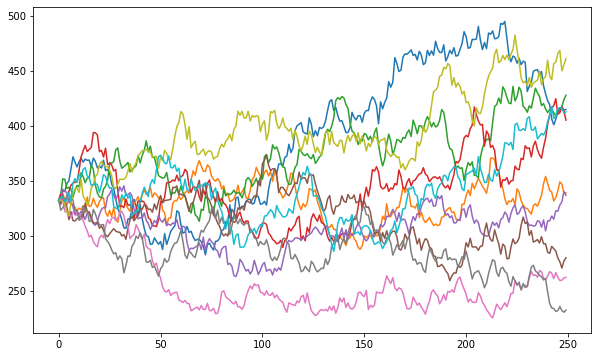

In [17]:
plt.figure(figsize=(10,6))
plt.plot(price_list);